# Price Optimization with Price Elasticity of Demand

**Description**

The price elasticity of demand refers to the sensitivity of the demand for a product to changes in price. In simple terms, it means the degree to which the demand for a product changes with an increase or decrease in its price. For example, the demand for a product increases by 20% due to a 10% decrease in price. This is what is meant by a change in demand due to a change in the price of a product. And when you calculate the rate of change in demand, it's called the price elasticity of demand.

To calculate the price elasticity of demand, you have to use the formula mentioned below:

- **Percent Change in Quantity Demanded / Percent Change in Price**

**Variabel**

- product_id : id of the product
- Price : The price of the product
- Quantity order : The number of orders or requests for the product

## Import Packages

In [455]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [456]:
Orders = pd.read_csv('olist_orders_dataset.csv')
Products = pd.read_csv('olist_products_dataset.csv')
Order_items = pd.read_csv('olist_order_items_dataset.csv')
Product_category_name = pd.read_csv('product_category_name_translation.csv')

In [457]:
# extract the data we need
Orders = Orders[Orders['order_status'] == 'delivered']
df_orders = Orders[['order_id', 'order_purchase_timestamp']]
df_order_items = Order_items[['order_id', 'order_item_id', 'product_id','price']]
df_products = Products[['product_id','product_category_name']].merge(Product_category_name, how='left', on='product_category_name').drop(columns='product_category_name')

In [458]:
# based on the schema, we merge the products dataset with the items dataset
items_product = pd.merge(df_orders,df_order_items,left_on='order_id',right_on='order_id')
orders = items_product.merge(df_products,on ='product_id')
orders

,order_id,order_purchase_timestamp,order_item_id,product_id,price,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,housewares
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:47,1,87285b34884572647811a353c7ac498a,29.99,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:46,1,87285b34884572647811a353c7ac498a,29.99,housewares
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumery
...,...,...,...,...,...,...
110192,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:07,1,0df37da38a30a713453b03053d60d3f7,356.00,sports_leisure
110193,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:07,2,0df37da38a30a713453b03053d60d3f7,356.00,sports_leisure
110194,cfa78b997e329a5295b4ee6972c02979,2017-12-20 09:52:41,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,musical_instruments
110195,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,1,ac35486adb7b02598c182c2ff2e05254,72.00,health_beauty


In [459]:
orders['order_id'].duplicated().sum()

13719

In [460]:
# Drop duplicates
orders.drop_duplicates(subset=['order_id'], keep="first", inplace=True)

In [461]:
orders['order_id'].duplicated().sum()

0

In [462]:
orders

,order_id,order_purchase_timestamp,order_item_id,product_id,price,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,housewares
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:47,1,87285b34884572647811a353c7ac498a,29.99,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:46,1,87285b34884572647811a353c7ac498a,29.99,housewares
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumery
...,...,...,...,...,...,...
110191,87b4c933f31145a28413b39d880ad6c3,2018-03-02 17:12:05,1,cbaf5898b92064cd5e399c7cff291d0a,57.99,health_beauty
110192,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:07,1,0df37da38a30a713453b03053d60d3f7,356.00,sports_leisure
110194,cfa78b997e329a5295b4ee6972c02979,2017-12-20 09:52:41,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,musical_instruments
110195,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,1,ac35486adb7b02598c182c2ff2e05254,72.00,health_beauty


In [463]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 110196
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96478 non-null  object 
 1   order_purchase_timestamp       96478 non-null  object 
 2   order_item_id                  96478 non-null  int64  
 3   product_id                     96478 non-null  object 
 4   price                          96478 non-null  float64
 5   product_category_name_english  95103 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.2+ MB


In [464]:
orders.select_dtypes(include='object').nunique()

order_id                         96478
order_purchase_timestamp         95956
product_id                       30797
product_category_name_english       71
dtype: int64

In [465]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.date
orders

,order_id,order_purchase_timestamp,order_item_id,product_id,price,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,1,87285b34884572647811a353c7ac498a,29.99,housewares
1,128e10d95713541c87cd1a2e48201934,2017-08-15,1,87285b34884572647811a353c7ac498a,29.99,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02,1,87285b34884572647811a353c7ac498a,29.99,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23,1,87285b34884572647811a353c7ac498a,29.99,housewares
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,1,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumery
...,...,...,...,...,...,...
110191,87b4c933f31145a28413b39d880ad6c3,2018-03-02,1,cbaf5898b92064cd5e399c7cff291d0a,57.99,health_beauty
110192,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10,1,0df37da38a30a713453b03053d60d3f7,356.00,sports_leisure
110194,cfa78b997e329a5295b4ee6972c02979,2017-12-20,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,musical_instruments
110195,9c5dedf39a927c1b2549525ed64a053c,2017-03-09,1,ac35486adb7b02598c182c2ff2e05254,72.00,health_beauty


In [466]:
orders['Month'] = [i.month for i in orders['order_purchase_timestamp']]

In [467]:
product_price = orders[['product_id', 'price']]
product_price

,product_id,price
0,87285b34884572647811a353c7ac498a,29.99
1,87285b34884572647811a353c7ac498a,29.99
2,87285b34884572647811a353c7ac498a,29.99
3,87285b34884572647811a353c7ac498a,29.99
4,595fac2a385ac33a80bd5114aec74eb8,118.70
...,...,...
110191,cbaf5898b92064cd5e399c7cff291d0a,57.99
110192,0df37da38a30a713453b03053d60d3f7,356.00
110194,3d2c44374ee42b3003a470f3e937a2ea,55.90
110195,ac35486adb7b02598c182c2ff2e05254,72.00


In [468]:
# Drop duplicates
product_price.drop_duplicates(subset=['product_id'], keep="first", inplace=True)
product_price

,product_id,price
0,87285b34884572647811a353c7ac498a,29.99
4,595fac2a385ac33a80bd5114aec74eb8,118.70
108,aa4383b373c6aca5d8797843e5594415,159.90
111,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
115,65266b2da20d04dbe00c5c2d3bb7859e,19.90
...,...,...
110191,cbaf5898b92064cd5e399c7cff291d0a,57.99
110192,0df37da38a30a713453b03053d60d3f7,356.00
110194,3d2c44374ee42b3003a470f3e937a2ea,55.90
110195,ac35486adb7b02598c182c2ff2e05254,72.00


In [469]:
orders.select_dtypes(include='object').nunique()

order_id                         96478
order_purchase_timestamp           612
product_id                       30797
product_category_name_english       71
dtype: int64

In [470]:
orders.select_dtypes(exclude='object').nunique()

order_item_id       7
price            5750
Month              12
dtype: int64

## Calculate Matrix Covariance of Product Price

In [471]:
# Order agregation
matrix_cov = orders.groupby(['product_category_name_english', 'Month']).agg(
                        Rata_Harga = pd.NamedAgg(column="price", aggfunc="mean")).reset_index()
matrix_cov

,product_category_name_english,Month,Rata_Harga
0,agro_industry_and_commerce,1,342.848235
1,agro_industry_and_commerce,2,261.597778
2,agro_industry_and_commerce,3,197.095769
3,agro_industry_and_commerce,4,375.058333
4,agro_industry_and_commerce,5,404.974167
...,...,...,...
790,watches_gifts,8,177.932983
791,watches_gifts,9,170.721566
792,watches_gifts,10,230.688811
793,watches_gifts,11,215.685863


In [472]:
# filter product to price optimization example
matrix_cov = matrix_cov[(matrix_cov.product_category_name_english == 'health_beauty') | (matrix_cov.product_category_name_english == 'watches_gifts') |
                        (matrix_cov.product_category_name_english == 'agro_industry_and_commerce')]
matrix_cov

,product_category_name_english,Month,Rata_Harga
0,agro_industry_and_commerce,1,342.848235
1,agro_industry_and_commerce,2,261.597778
2,agro_industry_and_commerce,3,197.095769
3,agro_industry_and_commerce,4,375.058333
4,agro_industry_and_commerce,5,404.974167
5,agro_industry_and_commerce,6,445.981818
6,agro_industry_and_commerce,7,289.437778
7,agro_industry_and_commerce,8,287.346000
8,agro_industry_and_commerce,9,531.996667
9,agro_industry_and_commerce,10,670.056000


In [473]:
matrix_cov = matrix_cov.pivot_table('Rata_Harga', ['Month'], 'product_category_name_english')
matrix_cov

product_category_name_english,agro_industry_and_commerce,health_beauty,watches_gifts
Month,,,
1,342.848235,126.107016,235.024505
2,261.597778,138.769349,209.072321
3,197.095769,132.629925,247.504283
4,375.058333,138.171207,195.897427
5,404.974167,139.045135,210.921607
6,445.981818,128.112203,196.473910
7,289.437778,133.740509,192.726362
8,287.346000,145.942896,177.932983
9,531.996667,134.195098,170.721566


In [474]:
matrix_cov.reset_index(drop=True, inplace=True)
matrix_cov.head()

product_category_name_english,agro_industry_and_commerce,health_beauty,watches_gifts
0,342.848235,126.107016,235.024505
1,261.597778,138.769349,209.072321
2,197.095769,132.629925,247.504283
3,375.058333,138.171207,195.897427
4,404.974167,139.045135,210.921607


In [475]:
matrix_cov.cov()

product_category_name_english,agro_industry_and_commerce,health_beauty,watches_gifts
product_category_name_english,,,
agro_industry_and_commerce,23910.278695,-248.832401,-175.376397
health_beauty,-248.832401,55.456897,-77.606874
watches_gifts,-175.376397,-77.606874,516.893891


**Interpret the covariance matrix::**

Variance is used in statistics to describe the spread between data sets of the average value

- The variance of the agro_industry_and_commerce average price is 23910,27
- The variance of the healt beauty average price is 55,45
- The variance of the watches gifts average price is 516,89

## Create Dataset

This time, for price optimization, we will use order data from the health and beauty category.

In [476]:
# filter product to price optimization example
order = orders[orders['product_category_name_english'] == 'health_beauty']
order

,order_id,order_purchase_timestamp,order_item_id,product_id,price,product_category_name_english,Month
463,203096f03d82e0dffbc41ebc2e2bcfb7,2017-09-18,1,5ac9d9e379c606e36a8094a6046f75dc,109.90,health_beauty,9
464,d30680568af2e9f0aeba3420292df26d,2017-09-16,1,5ac9d9e379c606e36a8094a6046f75dc,109.90,health_beauty,9
465,b87c9466fb7a6b04a632222b07c1922d,2017-09-15,1,5ac9d9e379c606e36a8094a6046f75dc,109.90,health_beauty,9
466,04031be66943a9c385ff683fcc99d288,2017-09-16,1,5ac9d9e379c606e36a8094a6046f75dc,109.90,health_beauty,9
467,f848643eec1d69395095eb3840d2051e,2018-03-15,1,2b4609f8948be18874494203496bc318,79.99,health_beauty,3
...,...,...,...,...,...,...,...
110126,f3d113574c163b8642fb44302c8fe0c9,2017-06-23,1,9fa7e05ae5cddeb74ff2fe5046b742db,990.00,health_beauty,6
110173,3c042ee4b8b597c3d265a93a21bbf99f,2018-06-23,1,71806ae7a741f21e27a83b42237b2405,459.00,health_beauty,6
110191,87b4c933f31145a28413b39d880ad6c3,2018-03-02,1,cbaf5898b92064cd5e399c7cff291d0a,57.99,health_beauty,3
110195,9c5dedf39a927c1b2549525ed64a053c,2017-03-09,1,ac35486adb7b02598c182c2ff2e05254,72.00,health_beauty,3


In [477]:
# Order agregation
order = order.groupby(['product_id',]).agg(
                        Quantity_order = pd.NamedAgg(column="order_item_id", aggfunc="sum")).reset_index()
order

,product_id,Quantity_order
0,00210e41887c2a8ef9f791ebc780cc36,5
1,006619bbed68b000c8ba3f8725d5409e,1
2,00878d953636afec00d3e85d55a12e7f,10
3,008b0ec3de3638637099f97add750136,1
4,0092a9e1c8a471753ed7ffa7eef5086e,3
...,...,...
2312,ffbe3df3856b1fef3fee8f1264105a89,4
2313,ffc9caf33e2d1e9f44e3e06da19085f7,26
2314,ffd34459c21034d1da6df9800de0d7a3,3
2315,ffd7628b0b0b98ebc549e8e4c54a59af,1


In [478]:
order =  pd.merge(order, product_price, on=['product_id'], how='left')
order

,product_id,Quantity_order,price
0,00210e41887c2a8ef9f791ebc780cc36,5,32.98
1,006619bbed68b000c8ba3f8725d5409e,1,68.50
2,00878d953636afec00d3e85d55a12e7f,10,100.00
3,008b0ec3de3638637099f97add750136,1,69.49
4,0092a9e1c8a471753ed7ffa7eef5086e,3,44.90
...,...,...,...
2312,ffbe3df3856b1fef3fee8f1264105a89,4,47.99
2313,ffc9caf33e2d1e9f44e3e06da19085f7,26,199.89
2314,ffd34459c21034d1da6df9800de0d7a3,3,48.85
2315,ffd7628b0b0b98ebc549e8e4c54a59af,1,79.90


In [479]:
# Drop duplicates
order.drop_duplicates(subset=['product_id'], keep="first", inplace=True)
order

,product_id,Quantity_order,price
0,00210e41887c2a8ef9f791ebc780cc36,5,32.98
1,006619bbed68b000c8ba3f8725d5409e,1,68.50
2,00878d953636afec00d3e85d55a12e7f,10,100.00
3,008b0ec3de3638637099f97add750136,1,69.49
4,0092a9e1c8a471753ed7ffa7eef5086e,3,44.90
...,...,...,...
2312,ffbe3df3856b1fef3fee8f1264105a89,4,47.99
2313,ffc9caf33e2d1e9f44e3e06da19085f7,26,199.89
2314,ffd34459c21034d1da6df9800de0d7a3,3,48.85
2315,ffd7628b0b0b98ebc549e8e4c54a59af,1,79.90


In [480]:
order["% Change in Demand"] = order["Quantity_order"].pct_change()
order["% Change in Price"] = order["price"].pct_change()

In [481]:
order

,product_id,Quantity_order,price,% Change in Demand,% Change in Price
0,00210e41887c2a8ef9f791ebc780cc36,5,32.98,NaN,NaN
1,006619bbed68b000c8ba3f8725d5409e,1,68.50,-0.800000,1.077016
2,00878d953636afec00d3e85d55a12e7f,10,100.00,9.000000,0.459854
3,008b0ec3de3638637099f97add750136,1,69.49,-0.900000,-0.305100
4,0092a9e1c8a471753ed7ffa7eef5086e,3,44.90,2.000000,-0.353864
...,...,...,...,...,...
2312,ffbe3df3856b1fef3fee8f1264105a89,4,47.99,3.000000,-0.515253
2313,ffc9caf33e2d1e9f44e3e06da19085f7,26,199.89,5.500000,3.165243
2314,ffd34459c21034d1da6df9800de0d7a3,3,48.85,-0.884615,-0.755616
2315,ffd7628b0b0b98ebc549e8e4c54a59af,1,79.90,-0.666667,0.635619


In [482]:
order["Price Elasticity"] = order["% Change in Demand"] / order["% Change in Price"]
order.head(10)

,product_id,Quantity_order,price,% Change in Demand,% Change in Price,Price Elasticity
0,00210e41887c2a8ef9f791ebc780cc36,5,32.98,NaN,NaN,NaN
1,006619bbed68b000c8ba3f8725d5409e,1,68.50,-0.800000,1.077016,-0.742793
2,00878d953636afec00d3e85d55a12e7f,10,100.00,9.000000,0.459854,19.571429
3,008b0ec3de3638637099f97add750136,1,69.49,-0.900000,-0.305100,2.949853
4,0092a9e1c8a471753ed7ffa7eef5086e,3,44.90,2.000000,-0.353864,-5.651891
5,00e62bcf9337ca4c5d5b4c5c8188f8d2,1,208.69,-0.666667,3.647884,-0.182754
6,012dd0e1c1f14325ee35f06748329355,1,299.08,0.000000,0.433130,0.000000
7,015ec57b45a4c3efc70288eb133d623a,1,305.00,0.000000,0.019794,0.000000
8,0160814e8c847c018da9cf3e01c271be,1,79.56,0.000000,-0.739148,-0.000000
9,016711f78a6a87696645db0a6a834826,19,99.90,18.000000,0.255656,70.407080


Price elasticity of demand:
    
- Price elasticity > 1 : elastic product, the product is sensitive to price changes
- Price elasticity = 0 : perfect inelastic product, the product is not sensitive at all to price changes
- Price elasticity < 1 : inelastic product, the product is less sensitive to price changes

In [489]:
def elasticity(order):
    if order['Price Elasticity'] > 1 :
        return 'Elastic'
    elif order['Price Elasticity'] == 0.000 :
        return 'Perfect Inelastic'
    else:  
        return 'Inelastic'

order['Elasticity'] = order.apply(elasticity, axis=1)

In [490]:
order

,product_id,Quantity_order,price,% Change in Demand,% Change in Price,Price Elasticity,Elasticity
0,00210e41887c2a8ef9f791ebc780cc36,5,32.98,NaN,NaN,NaN,Inelastic
1,006619bbed68b000c8ba3f8725d5409e,1,68.50,-0.800000,1.077016,-0.742793,Inelastic
2,00878d953636afec00d3e85d55a12e7f,10,100.00,9.000000,0.459854,19.571429,Elastic
3,008b0ec3de3638637099f97add750136,1,69.49,-0.900000,-0.305100,2.949853,Elastic
4,0092a9e1c8a471753ed7ffa7eef5086e,3,44.90,2.000000,-0.353864,-5.651891,Inelastic
...,...,...,...,...,...,...,...
2312,ffbe3df3856b1fef3fee8f1264105a89,4,47.99,3.000000,-0.515253,-5.822388,Inelastic
2313,ffc9caf33e2d1e9f44e3e06da19085f7,26,199.89,5.500000,3.165243,1.737623,Elastic
2314,ffd34459c21034d1da6df9800de0d7a3,3,48.85,-0.884615,-0.755616,1.170721,Elastic
2315,ffd7628b0b0b98ebc549e8e4c54a59af,1,79.90,-0.666667,0.635619,-1.048846,Inelastic


In [493]:
order.to_csv('product_elasticity_health_beauty.csv') 
print('Succes to csv')

Succes to csv


In [494]:
product = order.groupby(["Elasticity"])\
.agg({"product_id" : "nunique"})[["product_id"]]\
.apply(lambda x: 100*x/x.sum())\
.sort_values(by="product_id", ascending=False)
product.reset_index()

,Elasticity,product_id
0,Inelastic,44.626672
1,Perfect Inelastic,36.124299
2,Elastic,19.249029


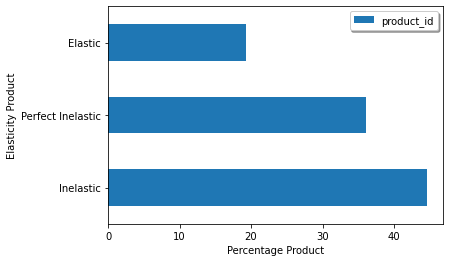

In [495]:
bar = product.plot.barh()
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1)
plt.ylabel('Elasticity Product')
plt.xlabel('Percentage Product')
plt.show()

## Conclusion

The price elasticity of demand refers to the sensitivity of the demand for a product to changes in price. In simple terms, it means the degree to which the demand for a product changes with an increase or decrease in its price. For elastic products, discounts can be given to customers who buy them because the demand for these products is sensitive to price changes.